<a href="https://colab.research.google.com/github/AgarwalGeeks/AmExpert/blob/master/AmExpert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing useful Libraries**

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path="/content/drive/My Drive/AmExpert/train_AUpWtIz/campaign_data.csv"
campaign_data=pd.read_csv(path)

In [0]:
path="/content/drive/My Drive/AmExpert/train_AUpWtIz/coupon_item_mapping.csv"
coupon_mapping_data=pd.read_csv(path)

In [0]:
path="/content/drive/My Drive/AmExpert/train_AUpWtIz/customer_demographics.csv"
customer_demographics_data=pd.read_csv(path)

In [0]:
path="/content/drive/My Drive/AmExpert/train_AUpWtIz/customer_transaction_data.csv"
customer_trabsaction_data=pd.read_csv(path)

In [0]:
path="/content/drive/My Drive/AmExpert/train_AUpWtIz/item_data.csv"
item_data=pd.read_csv(path)

In [0]:
path="/content/drive/My Drive/AmExpert/train_AUpWtIz/train.csv"
train_data=pd.read_csv(path)

In [0]:
path="/content/drive/My Drive/AmExpert/test_QyjYwdj.csv"
test_data=pd.read_csv(path)

In [14]:
train_data.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [15]:
test_data.head()

,id,campaign_id,coupon_id,customer_id
0,3,22,869,967
1,4,20,389,1566
2,5,22,981,510
3,8,25,1069,361
4,10,17,498,811


In [0]:
### Data has been selected randomly for training and testing 

In [18]:
concatenated_data=pd.concat([train_data,test_data],axis=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [19]:
concatenated_data.describe()

,campaign_id,coupon_id,customer_id,id,redemption_status
count,128595.000000,128595.000000,128595.000000,128595.000000,78369.000000
mean,16.098083,575.461301,797.198787,64298.000000,0.009302
std,6.960149,323.358007,456.938142,37122.323271,0.095999
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,10.000000,274.000000,412.000000,32149.500000,0.000000
50%,17.000000,593.000000,795.000000,64298.000000,0.000000
75%,20.000000,860.000000,1195.000000,96446.500000,0.000000
max,30.000000,1116.000000,1582.000000,128595.000000,1.000000


In [20]:
train_data.describe()

,id,campaign_id,coupon_id,customer_id,redemption_status
count,78369.000000,78369.000000,78369.000000,78369.000000,78369.000000
mean,64347.975449,13.974441,566.363243,787.451888,0.009302
std,37126.440855,8.019215,329.966054,456.811339,0.095999
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,32260.000000,8.000000,280.000000,399.000000,0.000000
50%,64318.000000,13.000000,597.000000,781.000000,0.000000
75%,96577.000000,13.000000,857.000000,1190.000000,0.000000
max,128595.000000,30.000000,1115.000000,1582.000000,1.000000


In [21]:
test_data.describe()

,id,campaign_id,coupon_id,customer_id
count,50226.000000,50226.000000,50226.000000,50226.000000
mean,64220.021941,19.411659,589.657249,812.407140
std,37116.132742,2.382066,312.242707,456.725166
min,3.000000,16.000000,28.000000,1.000000
25%,31964.500000,18.000000,266.000000,432.000000
50%,64279.500000,18.000000,592.000000,826.000000
75%,96235.000000,21.000000,864.000000,1209.000000
max,128594.000000,25.000000,1116.000000,1582.000000


In [22]:
concatenated_data.head()

,campaign_id,coupon_id,customer_id,id,redemption_status
0,13,27,1053,1,0.0
1,13,116,48,2,0.0
2,9,635,205,6,0.0
3,13,644,1050,7,0.0
4,8,1017,1489,9,0.0


In [0]:
concatenated_data_sorted=pd.concat([train_data,test_data],axis=0,sort=True)

In [24]:
concatenated_data_sorted.head()

,campaign_id,coupon_id,customer_id,id,redemption_status
0,13,27,1053,1,0.0
1,13,116,48,2,0.0
2,9,635,205,6,0.0
3,13,644,1050,7,0.0
4,8,1017,1489,9,0.0


In [25]:
concatenated_data_sorted.sort_values(by=['id'])

,campaign_id,coupon_id,customer_id,id,redemption_status
0,13,27,1053,1,0.0
1,13,116,48,2,0.0
0,22,869,967,3,NaN
1,20,389,1566,4,NaN
2,22,981,510,5,NaN
2,9,635,205,6,0.0
3,13,644,1050,7,0.0
3,25,1069,361,8,NaN
4,8,1017,1489,9,0.0
4,17,498,811,10,NaN


In [0]:
### This is the original data organizers may had

In [31]:
concatenated_data_sorted.describe()

,campaign_id,coupon_id,customer_id,id,redemption_status
count,128595.000000,128595.000000,128595.000000,128595.000000,78369.000000
mean,16.098083,575.461301,797.198787,64298.000000,0.009302
std,6.960149,323.358007,456.938142,37122.323271,0.095999
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,10.000000,274.000000,412.000000,32149.500000,0.000000
50%,17.000000,593.000000,795.000000,64298.000000,0.000000
75%,20.000000,860.000000,1195.000000,96446.500000,0.000000
max,30.000000,1116.000000,1582.000000,128595.000000,1.000000


In [33]:
concatenated_data_sorted['customer_id'].sort_values()

14848       1
27723       1
43258       1
27685       1
43732       1
25826       1
3233        1
2033        1
22056       1
26208       1
9151        1
22099       1
39691       1
26364       1
47254       1
39322       1
58566       1
69745       1
25583       1
67132       1
14840       1
47845       1
24686       1
11150       1
24977       1
28450       1
25089       1
18212       1
18746       1
42914       1
         ... 
31597    1582
55387    1582
18105    1582
51364    1582
27134    1582
49486    1582
26242    1582
73895    1582
16924    1582
36277    1582
36242    1582
43319    1582
7604     1582
15851    1582
15855    1582
37764    1582
16796    1582
37778    1582
26792    1582
35669    1582
43757    1582
35591    1582
3118     1582
16561    1582
26007    1582
4467     1582
35242    1582
4466     1582
48751    1582
47151    1582
Name: customer_id, Length: 128595, dtype: int64

In [76]:
concatenated_data.nunique()

campaign_id              28
coupon_id              1116
customer_id            1582
id                   128595
redemption_status         2
dtype: int64

In [0]:
###Looks like there are 1582 individual users

In [35]:
train_data['customer_id'].sort_values()

51584       1
71345       1
22606       1
77636       1
52554       1
57575       1
61747       1
69745       1
51690       1
27723       1
38033       1
29759       1
18443       1
33738       1
77605       1
74786       1
8616        1
74902       1
75992       1
50618       1
23065       1
77759       1
39322       1
40302       1
56613       1
2815        1
24621       1
11527       1
74012       1
25380       1
         ... 
29279    1582
62622    1582
9786     1582
9781     1582
55097    1582
31597    1582
33096    1582
40593    1582
6027     1582
75384    1582
19454    1582
29140    1582
50694    1582
62882    1582
48751    1582
46425    1582
54013    1582
21107    1582
34502    1582
25838    1582
34525    1582
62510    1582
75930    1582
15851    1582
9165     1582
15855    1582
50615    1582
56665    1582
12926    1582
1232     1582
Name: customer_id, Length: 78369, dtype: int64

In [36]:
test_data['customer_id'].sort_values()

19126       1
19854       1
14848       1
5206        1
2033        1
7555        1
18212       1
9151        1
32202       1
50175       1
4976        1
27923       1
49963       1
18746       1
1359        1
43258       1
27599       1
41665       1
49240       1
10169       1
3814        1
19713       1
43722       1
31093       1
5347        1
46990       1
13513       1
33258       1
44821       1
10804       1
         ... 
31050    1582
24943    1582
11716    1582
25342    1582
47151    1582
35242    1582
36242    1582
19762    1582
37619    1582
12158    1582
11140    1582
37847    1582
41385    1582
26242    1582
21442    1582
31572    1582
3118     1582
4929     1582
43319    1582
35591    1582
24030    1582
38321    1582
17819    1582
35669    1582
4466     1582
49571    1582
43757    1582
16561    1582
14716    1582
4467     1582
Name: customer_id, Length: 50226, dtype: int64

In [0]:
### Well we have every user both in training and testing set

In [38]:
concatenated_data_sorted['coupon_id'].sort_values()

31485       1
45446       1
19944       1
19541       1
71390       1
45316       1
42230       1
51340       1
45484       1
3169        1
18204       1
44976       1
54532       1
12221       1
1311        1
9841        1
71312       1
30257       1
14031       1
6101        1
8128        1
76161       1
31937       1
17325       1
63854       1
45628       1
56461       1
2210        1
36547       1
65535       1
         ... 
46657    1116
1530     1116
31112    1116
42891    1116
48343    1116
7498     1116
42054    1116
5042     1116
36328    1116
1558     1116
5598     1116
32525    1116
31233    1116
37666    1116
46139    1116
25570    1116
4244     1116
13882    1116
42877    1116
34043    1116
34970    1116
27680    1116
20527    1116
34035    1116
39068    1116
3326     1116
13322    1116
39090    1116
33925    1116
1564     1116
Name: coupon_id, Length: 128595, dtype: int64

In [39]:
train_data['coupon_id'].sort_values()

19541       1
14031       1
45446       1
9841        1
12221       1
76161       1
71390       1
44976       1
42230       1
36547       1
26002       1
6101        1
18204       1
3169        1
51340       1
71312       1
45316       1
31937       1
54532       1
17325       1
56461       1
45484       1
65535       1
8128        1
19944       1
30257       1
45628       1
63854       1
1311        1
31485       1
         ... 
64576    1114
31342    1114
39404    1114
11037    1114
42801    1115
42960    1115
64138    1115
2163     1115
21599    1115
12046    1115
70429    1115
68007    1115
71321    1115
31637    1115
39140    1115
44580    1115
44164    1115
72539    1115
24263    1115
7189     1115
21029    1115
965      1115
52876    1115
52926    1115
2330     1115
5578     1115
29568    1115
5339     1115
21953    1115
76396    1115
Name: coupon_id, Length: 78369, dtype: int64

In [40]:
test_data['coupon_id'].sort_values()

25653      28
36897      28
24998      28
17277      28
11857      28
28546      28
40019      28
28540      28
6045       28
26080      28
29534      28
21802      28
160        28
842        28
35840      28
3129       28
11839      28
26698      28
39749      28
16853      28
20040      28
44376      28
26703      28
6877       28
33266      28
24610      28
137        28
19122      28
12369      28
19706      28
         ... 
5167     1116
3326     1116
23631    1116
1530     1116
34970    1116
23537    1116
41341    1116
5414     1116
30957    1116
41898    1116
32975    1116
30909    1116
35240    1116
42877    1116
21117    1116
30857    1116
26468    1116
1154     1116
42891    1116
33963    1116
15007    1116
2508     1116
38710    1116
1564     1116
1558     1116
5292     1116
42951    1116
35018    1116
41005    1116
43970    1116
Name: coupon_id, Length: 50226, dtype: int64

In [0]:
### coupon data is different in both 

In [42]:
concatenated_data_sorted['campaign_id'].sort_values()

48310     1
22105     1
67097     1
28052     1
50237     1
43099     1
13305     1
50383     1
8492      1
13352     1
47690     1
22090     1
42899     1
3156      1
47114     1
13415     1
22534     1
3305      1
55317     1
3361      1
60427     1
27519     1
3458      1
35162     1
55127     1
55800     1
50074     1
32935     1
1933      1
78282     1
         ..
54510    30
70946    30
70945    30
54516    30
70940    30
70938    30
54519    30
36625    30
36616    30
11451    30
36615    30
11460    30
70924    30
22068    30
22067    30
11488    30
36584    30
22064    30
11504    30
54548    30
11514    30
11516    30
60798    30
36545    30
70882    30
36540    30
70880    30
63989    30
26973    30
37908    30
Name: campaign_id, Length: 128595, dtype: int64

In [0]:
### In total there are 30 campaigns

In [45]:
train_data['campaign_id'].sort_values()

60615     1
3361      1
47688     1
41682     1
44900     1
58585     1
18324     1
36287     1
13415     1
8492      1
62012     1
50074     1
11820     1
78282     1
6524      1
72272     1
47690     1
22105     1
35871     1
14612     1
7938      1
47114     1
40922     1
5644      1
42899     1
3156      1
31845     1
64146     1
28052     1
23610     1
         ..
49875    30
8294     30
20982    30
20969    30
20967    30
8241     30
8244     30
64737    30
64738    30
20954    30
43776    30
20948    30
8264     30
64747    30
73360    30
20941    30
64754    30
72961    30
20917    30
64762    30
49862    30
43767    30
38181    30
20912    30
38185    30
20897    30
20894    30
49872    30
64753    30
63256    30
Name: campaign_id, Length: 78369, dtype: int64

In [46]:
test_data['campaign_id'].sort_values()

35999    16
15932    16
8831     16
6075     16
3616     16
44857    16
13993    16
44859    16
18799    16
13996    16
18791    16
29050    16
22004    16
36952    16
41157    16
22012    16
8806     16
8821     16
8805     16
8835     16
3622     16
3628     16
3627     16
13963    16
36876    16
36879    16
44842    16
1867     16
18803    16
36884    16
         ..
2631     25
2630     25
37023    25
46345    25
37016    25
23529    25
46352    25
14137    25
8777     25
31573    25
27207    25
31578    25
36999    25
15280    25
2600     25
23491    25
14141    25
27218    25
8789     25
31593    25
46398    25
31591    25
36986    25
23506    25
2608     25
36990    25
15276    25
15279    25
46382    25
6150     25
Name: campaign_id, Length: 50226, dtype: int64

In [0]:
### campaigns are different in both training and testing

In [0]:
### In the initial phase we can say that training and testing data are different, it means training data can not be used for validation

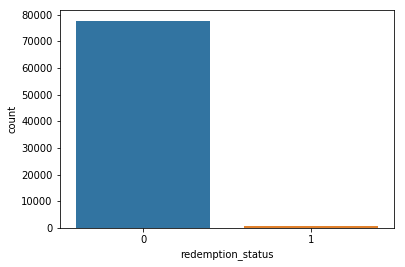

In [55]:
sns.countplot("redemption_status",data=train_data)

In [0]:
### very few people redeem coupons

In [57]:
### Let's analyse item table
item_data.head()

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


In [58]:
item_data.describe()

,item_id,brand
count,74066.000000,74066.000000
mean,37033.500000,1485.560055
std,21381.156856,1537.385673
min,1.000000,1.000000
25%,18517.250000,278.000000
50%,37033.500000,978.000000
75%,55549.750000,2013.000000
max,74066.000000,5528.000000


In [59]:
item_data['item_id'].unique()

array([    1,     2,     3, ..., 74064, 74065, 74066])

In [60]:
item_data['brand'].unique()

array([   1,   56,   11, ..., 5463, 2997, 3360])

In [61]:
item_data.nunique()

item_id       74066
brand          5528
brand_type        2
category         19
dtype: int64

In [0]:
### There are 5528 brands with 19 categories

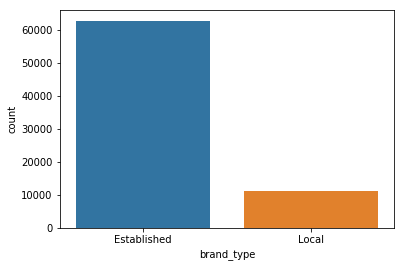

In [65]:
sns.countplot("brand_type",data=item_data)

In [0]:
### majority of brands are local

In [67]:
item_data.isnull().sum()

item_id       0
brand         0
brand_type    0
category      0
dtype: int64

In [0]:
### There is no missing value in item_data

In [69]:
### Let's explore coupon item mapping table
coupon_mapping_data.head()

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77


In [70]:
coupon_mapping_data.describe()

,coupon_id,item_id
count,92663.000000,92663.000000
mean,155.967387,36508.613071
std,282.991720,21131.312716
min,1.000000,1.000000
25%,22.000000,18255.500000
50%,30.000000,37955.000000
75%,42.000000,54191.500000
max,1116.000000,74061.000000


In [71]:
coupon_mapping_data['coupon_id'].sort_values()

31428       1
31427       1
29133       1
29036       1
31429       1
31439       1
29956       1
30909       1
30908       1
31075       1
30907       1
30836       1
30043       1
29198       1
29187       1
29179       1
29178       1
29117       1
29177       1
30837       1
31426       1
30622       1
28967       1
28916       1
31203       1
31154       1
28734       1
28629       1
28693       1
28620       1
         ... 
3375     1112
2093     1112
12649    1112
4920     1113
3310     1113
5097     1113
4143     1113
5969     1113
6016     1113
3694     1113
3619     1113
6555     1113
6607     1113
3578     1113
2809     1113
10007    1113
10006    1113
6750     1113
14627    1114
14626    1114
14625    1114
28081    1115
29769    1115
28082    1115
28083    1115
30903    1115
30902    1115
30901    1115
65993    1116
65689    1116
Name: coupon_id, Length: 92663, dtype: int64

In [0]:
### coupon mapping contains all types of coupons

In [73]:
### Let's explore customer demographics
customer_demographics_data.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


In [75]:
customer_demographics_data.nunique()

customer_id       760
age_range           6
marital_status      2
rented              2
family_size         5
no_of_children      3
income_bracket     12
dtype: int64

In [78]:
customer_demographics_data['customer_id'].min()

1